## Data Exploration

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#plt.rcdefaults()

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Function for dropping columns

def drop_columns(dataset,column_names):
    dataset = dataset.drop(column_names,axis = 1)
    return dataset

In [3]:
# Function for droping rows

def drop_rows(dataset,row_names):
    dataset = dataset.drop(row_names,axis = 0)
    return dataset

In [9]:
# Load in the data gotten from then world bank and display the first 5 rows of the data

df_world_bank = pd.read_csv("C:\dataset\API_19_DS2_en_csv_v2_3931355.csv", skiprows=4)
df_countries = pd.read_csv("C:\dataset\All countries.csv")
df_world_bank.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776,50.761000,50.746000,50.730000,50.715000,50.700000,...,42.957000,42.990000,43.041000,43.108000,43.192000,43.293000,43.411000,43.546000,43.697000,NaN
1,Aruba,ABW,Urban population,SP.URB.TOTL,27525.000,28139.000000,28537.000000,28763.000000,28922.000000,29080.000000,...,44059.000000,44351.000000,44666.000000,44978.000000,45293.000000,45614.000000,45949.000000,46294.000000,46654.000000,NaN
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,NaN,2.206183,1.404498,0.788835,0.551271,0.544810,...,0.543931,0.660561,0.707733,0.696090,0.697901,0.706219,0.731740,0.748028,0.774631,NaN
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.000,55434.000000,56234.000000,56699.000000,57029.000000,57357.000000,...,102565.000000,103165.000000,103776.000000,104339.000000,104865.000000,105361.000000,105846.000000,106310.000000,106766.000000,NaN
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,NaN,2.236462,1.432843,0.823502,0.580334,0.573498,...,0.503385,0.583290,0.590508,0.541048,0.502860,0.471874,0.459266,0.437415,0.428017,NaN


In [10]:
# Check the first five records

df_countries.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [11]:
# Rename columns

df_countries.rename(columns={'name':'Country Name', 'alpha-3':'Country Code'}, inplace=True)
df_countries_final = df_countries[['Country Name', 'Country Code']]
df_countries_final.head()

,Country Name,Country Code
0,Afghanistan,AFG
1,Åland Islands,ALA
2,Albania,ALB
3,Algeria,DZA
4,American Samoa,ASM


In [12]:
# Check the number of rows and columns in the dataframe

df_countries_final.shape

(249, 2)

In [13]:
# Check the number of rows and columns in the dataframe

df_world_bank.shape

(20216, 66)

We found that there are 20216 rows and 66 columns in the loaded dataframe.

In [14]:
# Summary statistics presented in a transposed format

df_world_bank.describe().T

,count,mean,std,min,25%,50%,75%,max
1960,3140.0,2.015940e+07,1.766754e+08,-3.667000,1.658243,42.140500,6640.735250,3.040000e+09
1961,4546.0,1.476890e+07,1.579775e+08,-3.667000,2.727489,30.368305,1764.864977,3.428000e+09
1962,4727.0,1.488896e+07,1.643346e+08,-3.667000,2.894394,35.428305,1786.300000,3.797000e+09
1963,4587.0,1.642074e+07,1.826950e+08,-370.367000,2.724582,30.895000,1831.447613,4.362000e+09
1964,4643.0,1.688664e+07,1.898123e+08,-3.667000,2.651414,31.158000,1824.767669,4.653000e+09
...,...,...,...,...,...,...,...,...
2017,8067.0,1.553889e+07,2.046260e+08,-28.307232,2.170596,22.925868,1279.250000,7.519183e+09
2018,7445.0,1.709443e+07,2.158258e+08,-1275.189986,2.066193,22.925044,1998.141844,7.602454e+09
2019,3718.0,3.435867e+07,3.084641e+08,-18.600160,2.763476,30.749500,100.000000,7.683372e+09
2020,2999.0,4.320922e+07,3.472421e+08,-34.208963,2.600000,23.004831,282.700000,7.761620e+09


Much insights cannot be drawn from the summary statistics table presented above as we do cannot identify the indicator whose summary corresponds with the output result above.

In [15]:
# Check for missing observations

df_world_bank.isnull().sum()

Country Name          0
Country Code          0
Indicator Name        0
Indicator Code        0
1960              17076
                  ...  
2017              12149
2018              12771
2019              16498
2020              17217
Unnamed: 65       20216
Length: 66, dtype: int64

In [16]:
# Check for the percentage of missing observations in each column

percent_missing = df_world_bank.isnull().sum() * 100 / len(df_world_bank)
percent_missing

Country Name        0.000000
Country Code        0.000000
Indicator Name      0.000000
Indicator Code      0.000000
1960               84.467748
                     ...    
2017               60.095964
2018               63.172734
2019               81.608627
2020               85.165216
Unnamed: 65       100.000000
Length: 66, dtype: float64

We observed that there are a lot of missing observations in the dataframe. Hence, we shall at a later time limit the years under study to contain only records from year 1990 to year 2010

In [84]:
# Transpose the dataframe to make the country column the index and the year the columns

Transpose = df_world_bank
Transpose.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776,50.761000,50.746000,50.730000,50.715000,50.700000,...,42.957000,42.990000,43.041000,43.108000,43.192000,43.293000,43.411000,43.546000,43.697000,NaN
1,Aruba,ABW,Urban population,SP.URB.TOTL,27525.000,28139.000000,28537.000000,28763.000000,28922.000000,29080.000000,...,44059.000000,44351.000000,44666.000000,44978.000000,45293.000000,45614.000000,45949.000000,46294.000000,46654.000000,NaN
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,NaN,2.206183,1.404498,0.788835,0.551271,0.544810,...,0.543931,0.660561,0.707733,0.696090,0.697901,0.706219,0.731740,0.748028,0.774631,NaN
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.000,55434.000000,56234.000000,56699.000000,57029.000000,57357.000000,...,102565.000000,103165.000000,103776.000000,104339.000000,104865.000000,105361.000000,105846.000000,106310.000000,106766.000000,NaN
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,NaN,2.236462,1.432843,0.823502,0.580334,0.573498,...,0.503385,0.583290,0.590508,0.541048,0.502860,0.471874,0.459266,0.437415,0.428017,NaN


Upon transposing the dataframe, we found that the data structure is not so useable as we have a couple of unneeded rows in the transposed dataframe. We shall proceed to dropping some of these columns. We would have dropped all, but it might be difficult to identify the respective indicators at a later time. Also, transposing the dataframe has tremendously increased to 20216 columns as against 66 columns in the original dataframe.

In [18]:
# Processing the dataframe to make the country column the index and the year the columns

dataset_Transposed = drop_rows(Transpose, ['Country Code', 'Indicator Code'])
dataset_Transposed.head()

,0,1,2,3,4,5,6,7,8,9,...,20206,20207,20208,20209,20210,20211,20212,20213,20214,20215
Country Name,Aruba,Aruba,Aruba,Aruba,Aruba,Aruba,Aruba,Aruba,Aruba,Aruba,...,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe
Indicator Name,Urban population (% of total population),Urban population,Urban population growth (annual %),"Population, total",Population growth (annual %),Poverty headcount ratio at $1.90 a day (2011 P...,"Prevalence of underweight, weight for age (% o...","Community health workers (per 1,000 people)","Mortality rate, under-5 (per 1,000 live births)","Primary completion rate, total (% of relevant ...",...,Forest area (% of land area),Forest area (sq. km),Land area where elevation is below 5 meters (%...,Urban land area where elevation is below 5 met...,Urban land area where elevation is below 5 met...,Rural land area where elevation is below 5 met...,Rural land area where elevation is below 5 met...,Arable land (% of land area),Agricultural land (% of land area),Agricultural land (sq. km)
1960,50.776,27525.0,NaN,54208.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,50.761,28139.0,2.206183,55434.0,2.236462,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.87269,28.396019,109850.0
1962,50.746,28537.0,1.404498,56234.0,1.432843,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.001939,28.615743,110700.0


## Preprocessing and Visualization of the Original Dataframe (df)

In [19]:
# Create a new dataframe for records between year 1990 and year 2010

dataset = df_world_bank[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010']]
dataset.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.319000,50.304000,49.998000,49.588000,49.17700,48.767000,...,46.339000,45.972000,45.606000,45.240000,44.875000,44.511000,44.147000,43.783000,43.421000,43.059000
1,Aruba,ABW,Urban population,SP.URB.TOTL,31274.000000,32508.000000,34119.000000,35949.000000,37721.00000,39172.000000,...,43045.000000,43670.000000,44245.000000,44672.000000,44888.000000,44880.000000,44688.000000,44379.000000,44051.000000,43776.000000
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,1.784062,3.869913,4.836820,5.224685,4.81157,3.774524,...,1.391917,1.441529,1.308100,0.960454,0.482359,-0.017824,-0.428725,-0.693862,-0.741833,-0.626233
3,Aruba,ABW,"Population, total",SP.POP.TOTL,62152.000000,64623.000000,68240.000000,72495.000000,76705.00000,80324.000000,...,92892.000000,94992.000000,97016.000000,98744.000000,100028.000000,100830.000000,101226.000000,101362.000000,101452.000000,101665.000000
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,1.816830,3.898739,5.446052,6.048669,5.64493,4.610156,...,2.205163,2.235515,2.108324,1.765473,1.291950,0.798578,0.391971,0.134263,0.088751,0.209731


In [20]:
# Melt the dataframe to convert the year columns into a single column

dataset = dataset.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='Value')
dataset.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,1990,50.319000
1,Aruba,ABW,Urban population,SP.URB.TOTL,1990,31274.000000
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,1990,1.784062
3,Aruba,ABW,"Population, total",SP.POP.TOTL,1990,62152.000000
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,1990,1.816830


In [21]:
# Extracting only the needed indicators from the dataframe.
# Here , arable land and forest area are the chosen indicators for this assignment

df_elect = dataset[(dataset['Indicator Name'] == "Access to electricity (% of population)")]
df_popul = dataset[(dataset['Indicator Name'] == "Population, total")]

# Check the first five records
df_elect.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
61,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,1990,100.0
137,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,1990,NaN
213,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,1990,NaN
289,Africa Western and Central,AFW,Access to electricity (% of population),EG.ELC.ACCS.ZS,1990,NaN
365,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,1990,NaN


In [22]:
# Check the first five records

df_popul.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
3,Aruba,ABW,"Population, total",SP.POP.TOTL,1990,62152.0
79,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,1990,304648010.0
155,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1990,12412311.0
231,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,1990,204803865.0
307,Angola,AGO,"Population, total",SP.POP.TOTL,1990,11848385.0


In [23]:
# Merge the two dataframes to make one dataframe

df_merged = df_elect.merge(df_popul, on=['Country Name', 'Country Code', 'Year'])
df_merged.head()

,Country Name,Country Code,Indicator Name_x,Indicator Code_x,Year,Value_x,Indicator Name_y,Indicator Code_y,Value_y
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,1990,100.0,"Population, total",SP.POP.TOTL,62152.0
1,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,1990,NaN,"Population, total",SP.POP.TOTL,304648010.0
2,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,1990,NaN,"Population, total",SP.POP.TOTL,12412311.0
3,Africa Western and Central,AFW,Access to electricity (% of population),EG.ELC.ACCS.ZS,1990,NaN,"Population, total",SP.POP.TOTL,204803865.0
4,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,1990,NaN,"Population, total",SP.POP.TOTL,11848385.0


In [24]:
# Renamme columns

df_merged.rename(columns={'Value_x':'Access to electricity (% of population))', 'Value_y':'Population (total)'}, inplace=True)
df_merged.head()

,Country Name,Country Code,Indicator Name_x,Indicator Code_x,Year,Access to electricity (% of population)),Indicator Name_y,Indicator Code_y,Population (total)
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,1990,100.0,"Population, total",SP.POP.TOTL,62152.0
1,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,1990,NaN,"Population, total",SP.POP.TOTL,304648010.0
2,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,1990,NaN,"Population, total",SP.POP.TOTL,12412311.0
3,Africa Western and Central,AFW,Access to electricity (% of population),EG.ELC.ACCS.ZS,1990,NaN,"Population, total",SP.POP.TOTL,204803865.0
4,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,1990,NaN,"Population, total",SP.POP.TOTL,11848385.0


In [25]:
# Drop the columns not needed for our analysis

df_merged = drop_columns(df_merged, ['Indicator Code_x', 'Indicator Code_y'])
df_merged.head()

,Country Name,Country Code,Indicator Name_x,Year,Access to electricity (% of population)),Indicator Name_y,Population (total)
0,Aruba,ABW,Access to electricity (% of population),1990,100.0,"Population, total",62152.0
1,Africa Eastern and Southern,AFE,Access to electricity (% of population),1990,NaN,"Population, total",304648010.0
2,Afghanistan,AFG,Access to electricity (% of population),1990,NaN,"Population, total",12412311.0
3,Africa Western and Central,AFW,Access to electricity (% of population),1990,NaN,"Population, total",204803865.0
4,Angola,AGO,Access to electricity (% of population),1990,NaN,"Population, total",11848385.0


In [26]:
# Create a new dataframe by merging the world dataframe with the existing dataframe

df_final = df_merged.merge(df_countries_final, on=['Country Name', 'Country Code',])
df_final.head()

,Country Name,Country Code,Indicator Name_x,Year,Access to electricity (% of population)),Indicator Name_y,Population (total)
0,Aruba,ABW,Access to electricity (% of population),1990,100.000000,"Population, total",62152.0
1,Aruba,ABW,Access to electricity (% of population),1991,99.153656,"Population, total",64623.0
2,Aruba,ABW,Access to electricity (% of population),1992,99.197128,"Population, total",68240.0
3,Aruba,ABW,Access to electricity (% of population),1993,99.239914,"Population, total",72495.0
4,Aruba,ABW,Access to electricity (% of population),1994,100.000000,"Population, total",76705.0


In [27]:
# Drop Columns not needed in the dataframe

df_final = drop_columns(df_final, ['Indicator Name_x', 'Indicator Name_y', ])
df_final.head()

,Country Name,Country Code,Year,Access to electricity (% of population)),Population (total)
0,Aruba,ABW,1990,100.000000,62152.0
1,Aruba,ABW,1991,99.153656,64623.0
2,Aruba,ABW,1992,99.197128,68240.0
3,Aruba,ABW,1993,99.239914,72495.0
4,Aruba,ABW,1994,100.000000,76705.0


In [28]:
# Check for the number of observations (rows) and attributes (columns) in the dataframe

df_final.shape

(4416, 5)

In [29]:
# Produce a summary statistics of the numerical variables in the dataframe

df_final.describe()

,Access to electricity (% of population)),Population (total)
count,3497.000000,4.413000e+03
mean,79.304171,2.856221e+07
std,31.489565,1.227270e+08
min,0.533899,8.910000e+03
25%,69.559090,6.150130e+05
50%,99.269470,4.910642e+06
75%,100.000000,1.518417e+07
max,100.000000,1.337705e+09


In [30]:
# Check for missing observations

df_final.isnull().sum()

Country Name                                  0
Country Code                                  0
Year                                          0
Access to electricity (% of population))    919
Population (total)                            3
dtype: int64

In [31]:
# Check for the percentage of missing observations in each column

percent_missing = df_final.isnull().sum() * 100 / len(df_final)
percent_missing

Country Name                                 0.000000
Country Code                                 0.000000
Year                                         0.000000
Access to electricity (% of population))    20.810688
Population (total)                           0.067935
dtype: float64

In [32]:
# Dropping missing observations from the dataframe and creating a new dataframe to hold the the updated data

df_final_1 = df_final.dropna(inplace=False)
df_final_1.head()

,Country Name,Country Code,Year,Access to electricity (% of population)),Population (total)
0,Aruba,ABW,1990,100.000000,62152.0
1,Aruba,ABW,1991,99.153656,64623.0
2,Aruba,ABW,1992,99.197128,68240.0
3,Aruba,ABW,1993,99.239914,72495.0
4,Aruba,ABW,1994,100.000000,76705.0


In [33]:
# Check the number of rows and columns in the newly created dataframe

df_final_1.shape

(3494, 5)

In [34]:
# Check for unique entities

df_final_1.nunique()

Country Name                                 182
Country Code                                 182
Year                                          21
Access to electricity (% of population))    1586
Population (total)                          3073
dtype: int64

In [35]:
# Summary Statistics

df_final_1.describe()

,Access to electricity (% of population)),Population (total)
count,3494.000000,3.494000e+03
mean,79.286402,2.769395e+07
std,31.497240,1.141693e+08
min,0.533899,9.506000e+03
25%,69.502287,5.797990e+05
50%,99.258990,5.064509e+06
75%,100.000000,1.507164e+07
max,100.000000,1.337705e+09


Upon the tractions, we are left with 2592 observations (rows)

## Data Grouping

Next, we shall group the dataframe by two metrics; **year**, **country name**. This will afford us the opportunity to draw some insights from the created dataframe.

In [85]:
# Grouping by year

df_final_extracted_year = df_final_1[['Country Name', 'Country Code', 'Year', 'Access to electricity (% of population))', 'Population (total)']].groupby('Year', as_index=False).mean()
df_final_extracted_year.head()

,Year,Access to electricity (% of population)),Population (total)
0,1990,95.801673,1.460834e+07
1,1991,90.644320,1.681708e+07
2,1992,86.677032,1.732945e+07
3,1993,84.219742,2.614312e+07
4,1994,83.123632,2.561210e+07


In [38]:
# Summary Statistics

df_final_extracted_year.describe()

,Access to electricity (% of population)),Population (total)
count,21.000000,2.100000e+01
mean,80.458711,2.701828e+07
std,5.100586,5.483479e+06
min,76.268540,1.460834e+07
25%,77.278993,2.422283e+07
50%,78.277611,3.053149e+07
75%,81.993133,3.114268e+07
max,95.801673,3.277562e+07


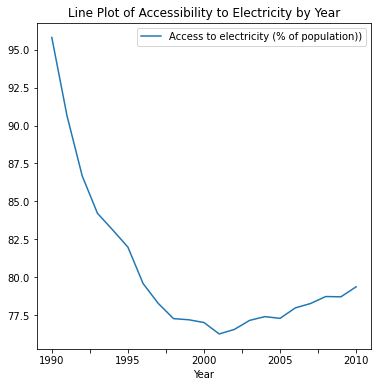

In [39]:
# Line chart of Arable Land

df_final_extracted_year.plot(x='Year', y=['Access to electricity (% of population))'], kind='line', figsize=(6,6), title='Line Plot of Accessibility to Electricity by Year')

plt.legend()
plt.show()

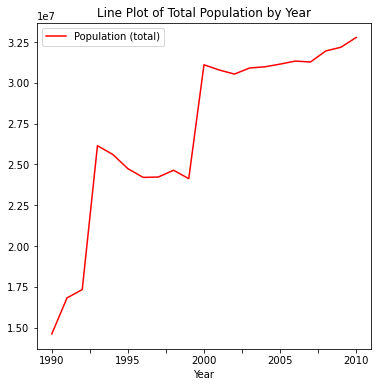

In [40]:
# Line chart of Forest Area

df_final_extracted_year.plot(x='Year', y=['Population (total)'], kind='line', figsize=(6,6), color="red", title='Line Plot of Total Population by Year')

plt.legend()
plt.show()

In [41]:
# View top 5 countries by Arable land

df_final_extracted_year.nlargest(5, 'Access to electricity (% of population))')

,Year,Access to electricity (% of population)),Population (total)
0,1990,95.801673,1.460834e+07
1,1991,90.644320,1.681708e+07
2,1992,86.677032,1.732945e+07
3,1993,84.219742,2.614312e+07
4,1994,83.123632,2.561210e+07


In [42]:
# View top 5 countries by Forest area

df_final_extracted_year.nlargest(5, 'Population (total)')

,Year,Access to electricity (% of population)),Population (total)
20,2010,79.377156,3.277562e+07
19,2009,78.716942,3.217703e+07
18,2008,78.734953,3.194783e+07
16,2006,77.986447,3.132856e+07
17,2007,78.274987,3.127165e+07


In [43]:
# Check the correlation between the variables (numerical) available in the dataframe

df_final_extracted_year.corr()

,Access to electricity (% of population)),Population (total)
Access to electricity (% of population)),1.000000,-0.830596
Population (total),-0.830596,1.000000


The above shows that when the data is grouped by year, there will be a 83.05% reduction in the percentage of population that had access to electricity as total population (100,000) increases.

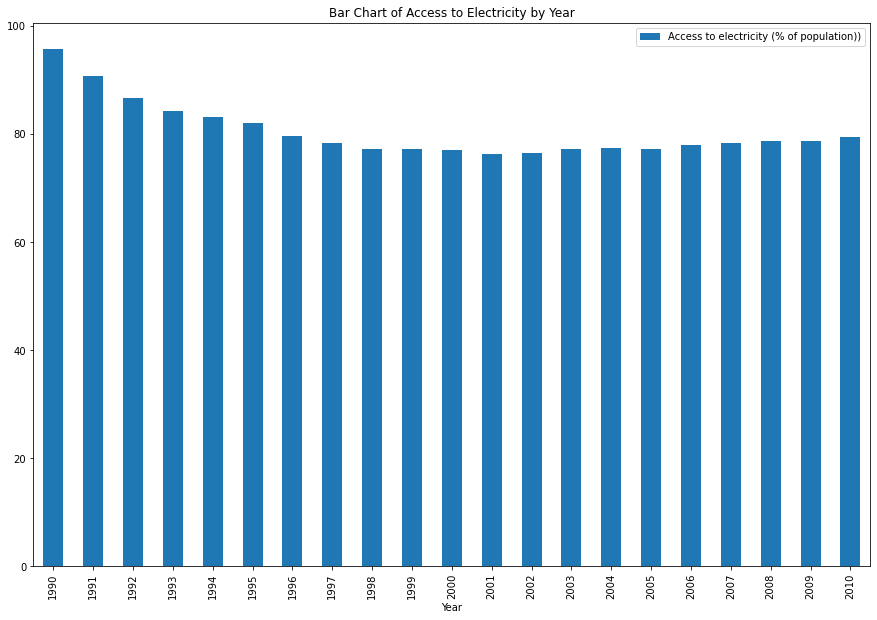

In [44]:
# Create a bar chart for comparing arable Land and forest area

df_final_extracted_year.plot(x='Year', y=['Access to electricity (% of population))'], kind='bar', figsize=(15,10), title='Bar Chart of Access to Electricity by Year')

plt.legend()
plt.show()

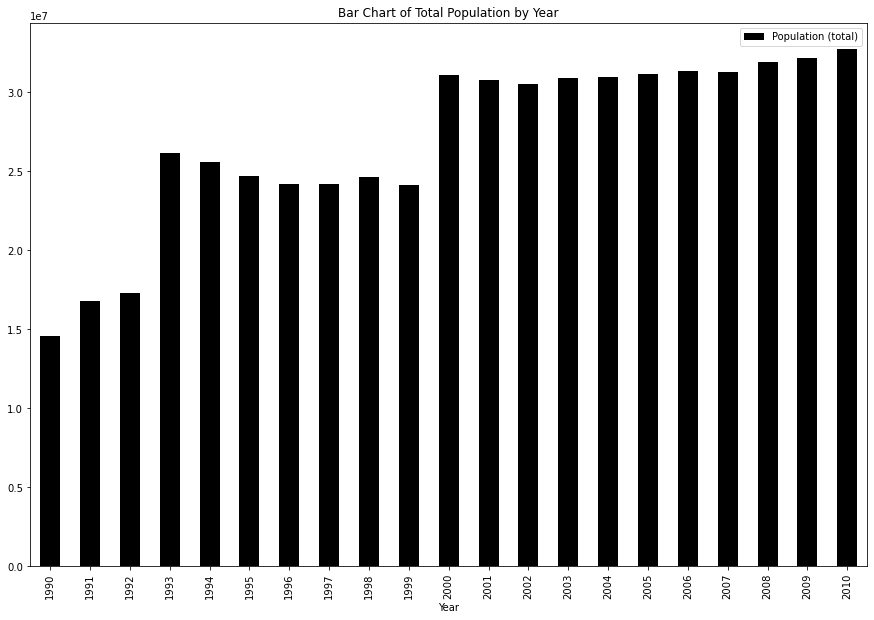

In [45]:
# Create a bar chart for comparing arable Land and forest area

df_final_extracted_year.plot(x='Year', y=['Population (total)'], kind='bar', figsize=(15,10), color = 'black', title='Bar Chart of Total Population by Year')

plt.legend()
plt.show()

In [46]:
# Grouping by country

df_final_extracted_country = df_final_1[['Country Name', 'Country Code', 'Year', 
                                                 'Access to electricity (% of population))', 'Population (total)', 
                                                 ]].groupby('Country Name', as_index=False).mean()
df_final_extracted_country.head()

,Country Name,Access to electricity (% of population)),Population (total)
0,Afghanistan,35.819586,2.741508e+07
1,Albania,100.000000,3.099619e+06
2,Algeria,98.979804,3.534731e+07
3,Andorra,100.000000,6.894625e+04
4,Angola,30.730295,1.993998e+07


In [47]:
# Summary Statistics

df_final_extracted_country.describe()

,Access to electricity (% of population)),Population (total)
count,182.000000,1.820000e+02
mean,75.592086,2.980063e+07
std,33.171389,1.272608e+08
min,2.250000,1.008567e+04
25%,50.176867,7.428341e+05
50%,96.907236,5.254640e+06
75%,100.000000,1.582824e+07
max,100.000000,1.302329e+09


In [48]:
# Check for the correlation

df_final_extracted_country.corr()

,Access to electricity (% of population)),Population (total)
Access to electricity (% of population)),1.000000,0.016902
Population (total),0.016902,1.000000


The above shows that when the data is grouped by country, there will be an increment by about 2% when total population increases.

In [49]:
# Create a dataframe for the top 5 countries by Arable land

df_final_extracted_country_arable_5 = df_final_extracted_country.nlargest(5, 'Access to electricity (% of population))')
df_final_extracted_country_arable_5.head()

,Country Name,Access to electricity (% of population)),Population (total)
1,Albania,100.0,3.099619e+06
3,Andorra,100.0,6.894625e+04
9,Australia,100.0,1.921539e+07
10,Austria,100.0,8.047475e+06
15,Belarus,100.0,9.937421e+06


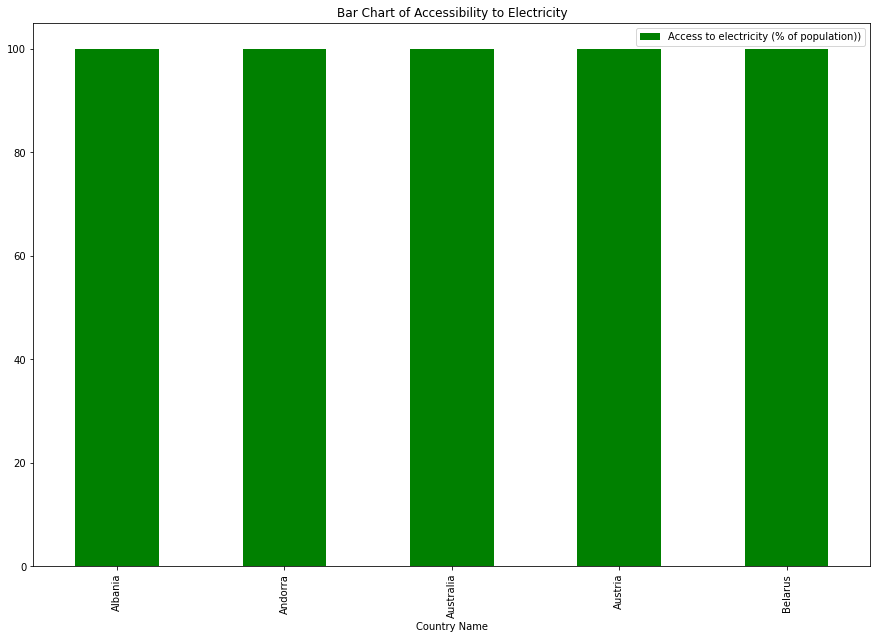

In [50]:
# Plot a bar chart for the top 5 countries by arable land
df_final_extracted_country_arable_5.plot(x='Country Name', y=['Access to electricity (% of population))'], kind='bar', figsize=(15,10), color='g', title='Bar Chart of Accessibility to Electricity')
plt.legend()
plt.show()

In [51]:
df_final_extracted_country_population_5 = df_final_extracted_country.nlargest(5, 'Population (total)')
df_final_extracted_country_population_5.head()

,Country Name,Access to electricity (% of population)),Population (total)
36,China,98.242003,1.302329e+09
75,India,60.880308,1.073867e+09
76,Indonesia,80.241203,2.121338e+08
23,Brazil,94.524370,1.733288e+08
126,Pakistan,70.549500,1.527726e+08


<AxesSubplot:title={'center':'Bar Chart of Accessibility to Electricity'}, xlabel='Country Name'>

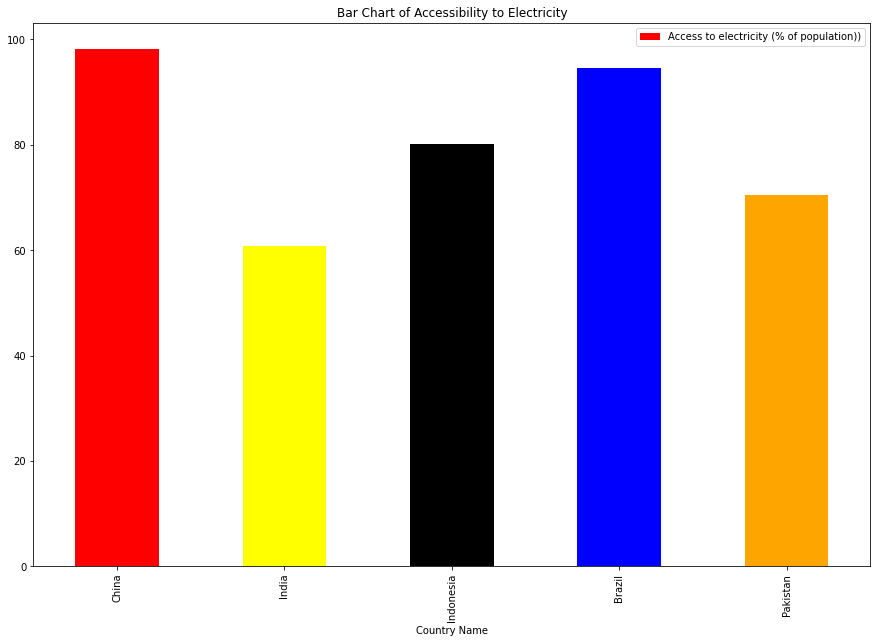

In [52]:
# Plot a bar chart for the top 5 countries by forest area
c = ['red', 'yellow', 'black', 'blue', 'orange']
df_final_extracted_country_population_5.plot.bar(x='Country Name', y='Access to electricity (% of population))', color=['red', 'yellow', 'black', 'blue', 'orange'], figsize=(15,10), title='Bar Chart of Accessibility to Electricity')


Next, we shall pick three notable African countries and visualize their data. The selected countries are:

1. China
2. India
3. Indonessia

In [53]:
# Dataframe for China

df_china = df_final_1[df_final_1['Country Name'] == 'China']
df_china.head()

,Country Name,Country Code,Year,Access to electricity (% of population)),Population (total)
805,China,CHN,2000,96.930870,1.262645e+09
806,China,CHN,2001,97.213219,1.271850e+09
807,China,CHN,2002,97.487282,1.280400e+09
808,China,CHN,2003,97.751877,1.288400e+09
809,China,CHN,2004,98.005836,1.296075e+09


<AxesSubplot:title={'center':'Line Plot of Accessibility to Electricity in China'}, xlabel='Year'>

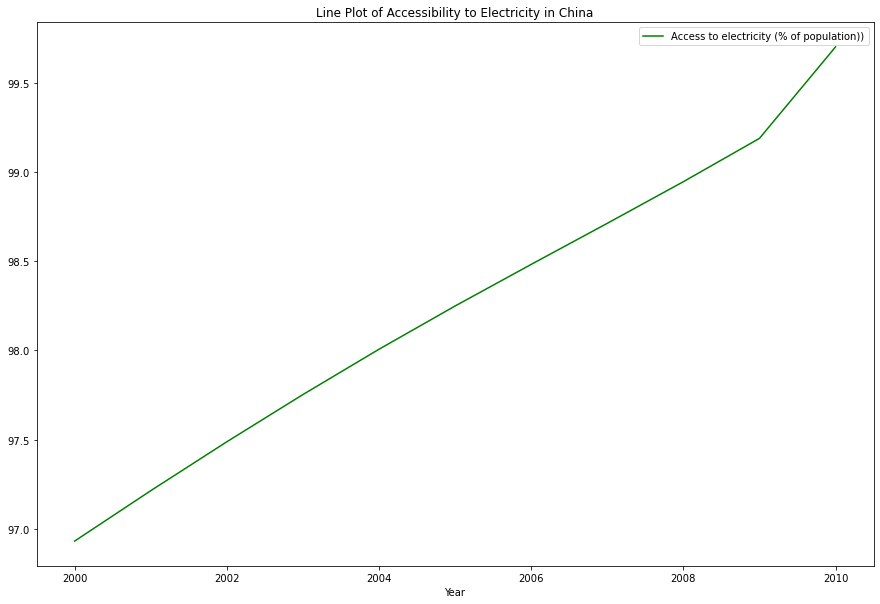

In [54]:
# Line plot of Percentage Change in Arable Land vs Percentage Change in Forest Area by Year

df_china.plot(kind='line', x='Year', y=['Access to electricity (% of population))'], figsize=(15, 10), color="green", title='Line Plot of Accessibility to Electricity in China')

In [55]:
df_china.corr()

,Access to electricity (% of population)),Population (total)
Access to electricity (% of population)),1.000000,0.994744
Population (total),0.994744,1.000000


From the above chart, we observed that in China, the percentage of population that has access to electricity has continued to increase over the years. A closer look at the population indicates that China has been doing incredibly well in meeting the electricity needs of people living in the country.

The result of the correlation analysis shows that per unit increase in population (100, 000), there is an increase in the percentage of population that has access to electricity by 99.47%.

In [56]:
# Dataframe for India

df_india= df_final_1[df_final_1['Country Name'] == 'India']
df_india.head()

,Country Name,Country Code,Year,Access to electricity (% of population)),Population (total)
1827,India,IND,1993,50.900000,9.274039e+08
1828,India,IND,1994,49.811310,9.456018e+08
1829,India,IND,1995,51.408775,9.639226e+08
1830,India,IND,1996,53.003521,9.823652e+08
1831,India,IND,1997,54.594864,1.000900e+09


<AxesSubplot:title={'center':'Line Plot of Accessibility to Electricity in India'}, xlabel='Year'>

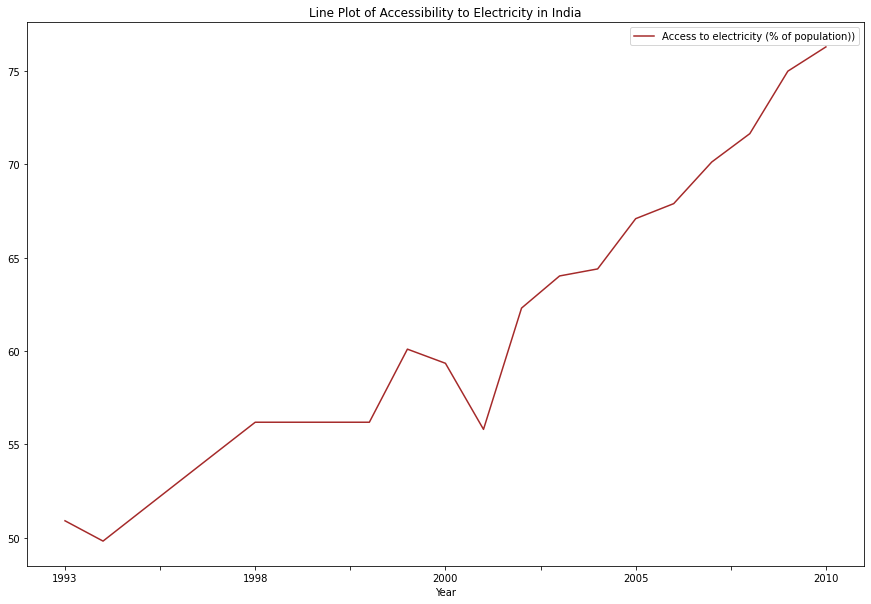

In [57]:
# Line plot of Percentage Change in Arable Land vs Percentage Change in Forest Area by Year

df_india.plot(kind='line', x='Year', y=['Access to electricity (% of population))'], figsize=(15, 10), color="brown", title='Line Plot of Accessibility to Electricity in India')

In [58]:
df_india.corr()

,Access to electricity (% of population)),Population (total)
Access to electricity (% of population)),1.000000,0.981487
Population (total),0.981487,1.000000


From the above chart, we observed that in India, the percentage of population that has access to electricity has continued to increase over the years, except in years 1994, 1998, and 2002 where there were noticeable drops. A closer look at the population indicates that China has been doing incredibly well in meeting the electricity needs of people living in the country.

The result of the correlation analysis shows that per unit increase in population (100, 000), there is an increase in the percentage of population that has access to electricity by 98.15%.

In [59]:
# Dataframe for Indonesia

df_indonesia = df_final_1[df_final_1['Country Name'] == 'Indonesia']
df_indonesia.head()

,Country Name,Country Code,Year,Access to electricity (% of population)),Population (total)
1777,Indonesia,IDN,1991,48.900000,184591897.0
1778,Indonesia,IDN,1992,66.696564,187739786.0
1779,Indonesia,IDN,1993,55.430000,190851184.0
1780,Indonesia,IDN,1994,62.800000,193917458.0
1781,Indonesia,IDN,1995,66.860000,196934257.0


<AxesSubplot:title={'center':'Line Plot of Accessibility to Electricity in Indonesia'}, xlabel='Year'>

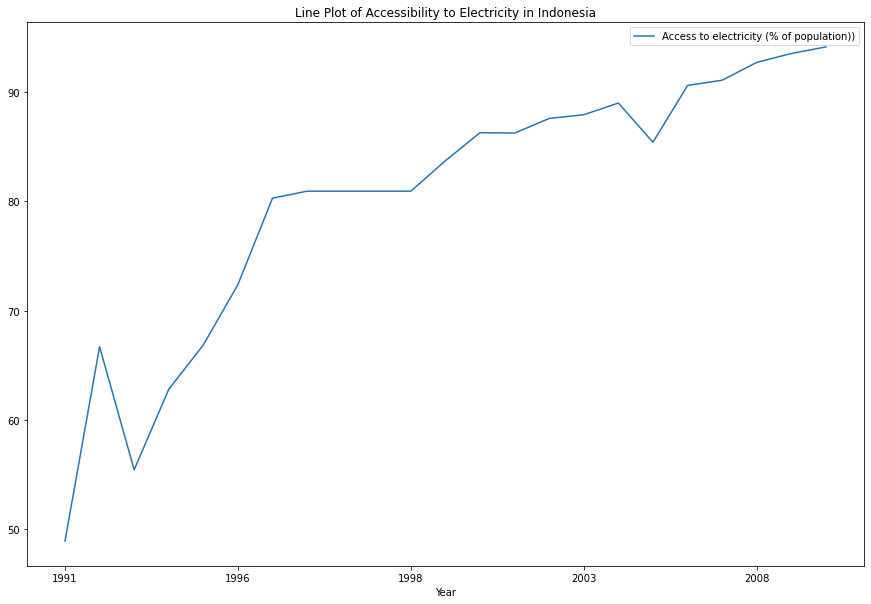

In [60]:
# Line plot of Percentage Change in Arable Land vs Percentage Change in Forest Area by Year

df_indonesia.plot(kind='line', x='Year', y=['Access to electricity (% of population))'], figsize=(15, 10), title='Line Plot of Accessibility to Electricity in Indonesia')

In [61]:
df_indonesia.corr()

,Access to electricity (% of population)),Population (total)
Access to electricity (% of population)),1.000000,0.895064
Population (total),0.895064,1.000000


From the above chart, we observed that in Indonesia, the percentage of population that has access to electricity has continued to increase over the years, except in years 1993, 1999, and 2006 where there were noticeable drops. A closer look at the population indicates that China has been doing incredibly well in meeting the electricity needs of people living in the country.

The result of the correlation analysis shows that per unit increase in population (100, 000), there is an increase in the percentage of population that has access to electricity by 89.51%.

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
%matplotlib inline

###### Select Features of Interest for Clustering

In [86]:
df_final_extracted_year

,Year,Access to electricity (% of population)),Population (total)
0,1990,95.801673,1.460834e+07
1,1991,90.644320,1.681708e+07
2,1992,86.677032,1.732945e+07
3,1993,84.219742,2.614312e+07
4,1994,83.123632,2.561210e+07
5,1995,81.993133,2.473750e+07
6,1996,79.588668,2.420379e+07
7,1997,78.277611,2.422283e+07
8,1998,77.278993,2.464058e+07
9,1999,77.204670,2.412559e+07


In [87]:
df_final_extracted_year.columns

Index(['Year', 'Access to electricity (% of population))',
       'Population (total)'],
      dtype='object')

###### Scale the Features using StandardScaler

In [90]:
select_df=df_final_extracted_year.copy()
X = StandardScaler().fit_transform(select_df)
X

array([[-1.65144565,  3.08236325, -2.31904026],
       [-1.48630108,  2.04626375, -1.90629367],
       [-1.32115652,  1.24924535, -1.81054673],
       [-1.15601195,  0.75558192, -0.16354211],
       [-0.99086739,  0.53537605, -0.26277204],
       [-0.82572282,  0.30826164, -0.4262095 ],
       [-0.66057826, -0.17478947, -0.5259424 ],
       [-0.49543369, -0.43817752, -0.52238461],
       [-0.33028913, -0.63879754, -0.44432082],
       [-0.16514456, -0.65372889, -0.54055545],
       [ 0.        , -0.690301  ,  0.76313336],
       [ 0.16514456, -0.84179495,  0.70360039],
       [ 0.33028913, -0.78131252,  0.65651079],
       [ 0.49543369, -0.66187448,  0.72645719],
       [ 0.66057826, -0.61234518,  0.73983397],
       [ 0.82572282, -0.6350964 ,  0.77072347],
       [ 0.99086739, -0.49667164,  0.80545941],
       [ 1.15601195, -0.43870481,  0.79482452],
       [ 1.32115652, -0.34629874,  0.92118127],
       [ 1.48630108, -0.34991705,  0.96401196],
       [ 1.65144565, -0.21728179,  1.075

###### Use k-Means Clustering

In [92]:
kmeans = KMeans(n_clusters=8)
model = kmeans.fit(X)
print("model\n", model)

model
 KMeans()


###### What are the centers of 8 clusters we formed

In [94]:
centers = model.cluster_centers_
centers

array([[ 0.24771685, -0.74382073,  0.71242543],
       [-1.32115652,  1.24924535, -1.81054673],
       [-0.99086739,  0.5330732 , -0.28417455],
       [-0.41286141, -0.47637335, -0.50830082],
       [ 0.90829511, -0.54570451,  0.77771034],
       [-1.65144565,  3.08236325, -2.31904026],
       [ 1.48630108, -0.30449919,  0.98702149],
       [-1.48630108,  2.04626375, -1.90629367]])

###### Visualization


Let us first create some utility functions which will help us in plotting graphs:

In [96]:
# Function that creates a DataFrame with a column for Cluster Number

def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [97]:
# Function that creates Parallel Plots

def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [99]:
P = pd_centers(select_df, centers)
P

,Year,Access to electricity (% of population)),Population (total),prediction
0,0.247717,-0.743821,0.712425,0
1,-1.321157,1.249245,-1.810547,1
2,-0.990867,0.533073,-0.284175,2
3,-0.412861,-0.476373,-0.508301,3
4,0.908295,-0.545705,0.777710,4
5,-1.651446,3.082363,-2.319040,5
6,1.486301,-0.304499,0.987021,6
7,-1.486301,2.046264,-1.906294,7


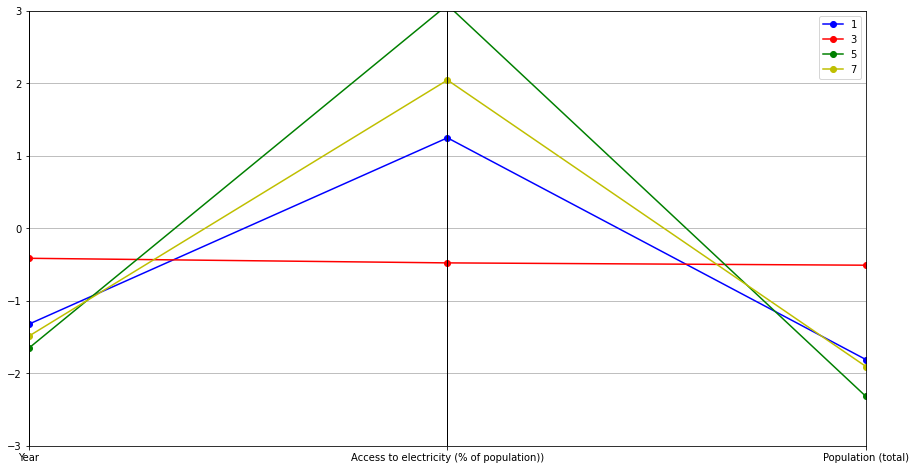

In [101]:
parallel_plot(P[P["Population (total)"] < -0.5])

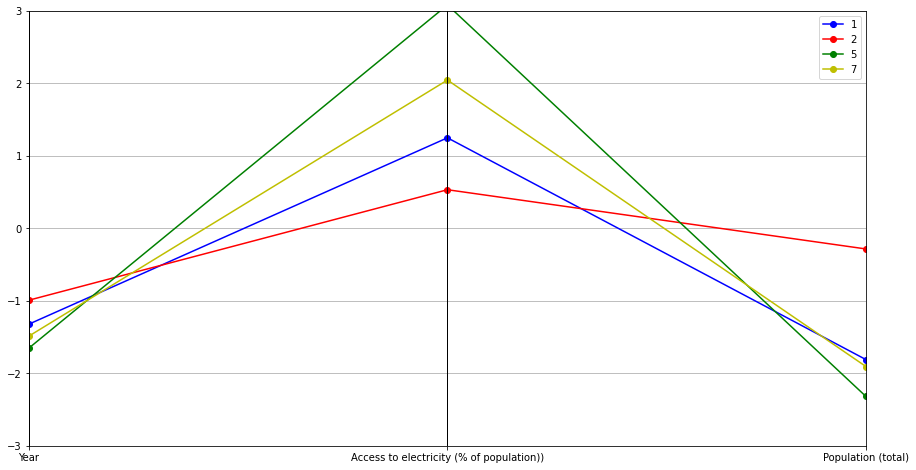

In [105]:
parallel_plot(P[P["Access to electricity (% of population))"] > 0.5])

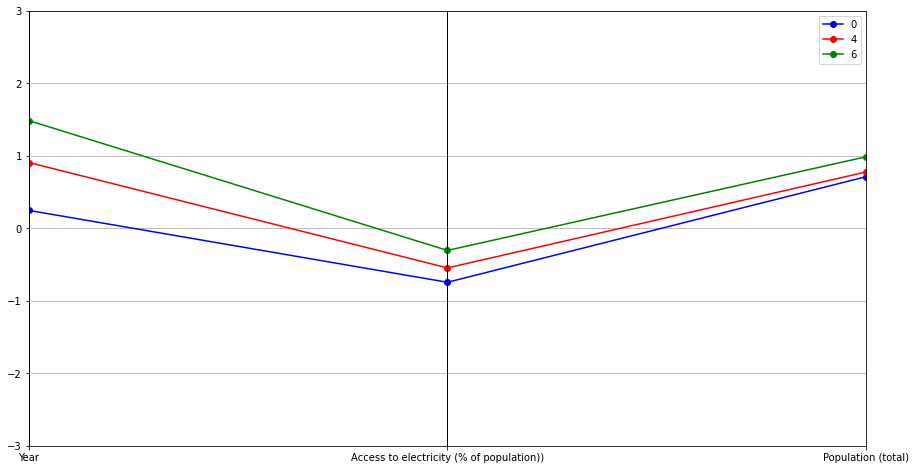

In [106]:
parallel_plot(P[(P["Population (total)"] > 0.5) & (P["Access to electricity (% of population))"] < 0.5)])